# SLU08 - Metrics for regression: Learning Notebook

In this notebook, you will learn about:

    - Loss functions vs. Evaluation Metrics
    - Mean Squared Error (MSE)
    - Root Mean Squared Error (RMSE)
    - Mean Absolute Error (MAE)
    - Coefficient of Determination (R²)
    - Adjusted R²
    - Scikitlearn metrics
    - Using metrics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor

## 1 - Loss functions vs. Evaluation metrics

A big part of data science is translating customer business problems into machine learning problems. An important step in this process is defining the **key performance indicators (KPIs)**. These are basically measures of success. To obtain maximum success your model should optimise towards these KPIs. Unfortunately, this is not always possible. 

As you know, the learning process during model training requires a differentiable loss (also called cost) function, and you have no guarantees that the KPI you defined with your customer will be differentiable. This means you need a proxy metric that approximates the true KPI but is differentiable. 

In the literature the KPI is commonly called the evaluation metric, and the proxy metric you use to train the model is the loss (cost) function. Many times these are actually the same, but you should be aware that they mean different things. So, don't forget:

* **Loss/cost function** is what is minimized when searching for the best model parameters;
* **Evaluation metric** is what you will use to evaluate how good your model is.

In a typical workflow you either receive or collaboratively define an evaluation metric. If this metric is differentiable, then you should most probably use it as your loss function. If it isn't, you should find an adequate proxy loss function.

Next we'll cover several metrics for regression problems that can be used both as evaluation metrics and loss functions.

## 2 - Metrics for regression

Before getting deeper into the performance metrics, it is best to clarify the definition of error, despite its intuitive concept.

When we predict a continuous variable, a common-sense definition of error is simple: we want the model predictions to be as close to actual values as possible.

So, in terms of model performance, **error** refers to the difference between the observed target value and the predicted value. The lower the difference between the observed outcome $y$ and the predicted outcome $\hat{y}$, the better the performance of the model. A higher difference means a worse performance of the model.

Now that this is clear, let's take a look at some of the metrics we can use to measure the performance of regression models! 

### 2.1 - Mean Absolute Error (MAE)

The average of the absolute differences between predicted values and observed values

$$MAE = \frac{1}{N} \sum_{n=1}^N \left|y_n - \hat{y}_n\right|$$

where $N$ is the number of observations in your dataset, $y_n$ is the target and $\hat{y}_n$ is the prediction for the observation $x_n$.

In [2]:
mae = lambda y, y_hat: np.abs(y - y_hat).mean()

* All the individual differences are weighted equally in the average, therefore it does not penalise larger errors more than smaller ones.
* Can only assume non-negative values.
* It's more robust to outliers than MSE (Mean Squared Error - see next section).
* It's more interpretable than the MSE since its values are in the same units as the target.
* The output can be interpreted as the expected error measured in the same units as the target. So, if you're predicting a price, the target is in \\$ unit and the evaluation metric has the same unit (\\$).

### 2.2 - Mean Squared Error (MSE)

The average of the squared differences between predicted values and observed values

$$MSE = \frac{1}{N} \sum_{n=1}^N (y_n - \hat{y}_n)^2$$

where $N$ is the number of observations in your dataset, $y_n$ is the target and $\hat{y}_n$ is the prediction for the observation $x_n$.

In [3]:
mse = lambda y, y_hat: ((y - y_hat)**2).mean()

* Can only assume non-negative values.
* It is more sensitive to outliers than MAE because the values are squared.
* Loses interpretability due to the squaring. So, if you're predicting a price, the labels have the unit \\$ but the evaluation metric has the unit \\$².

### 2.3 - Root Mean Squared Error (RMSE)

The square root of the average of the squared errors across all samples, effectively the square root of MSE.

$$RMSE = \sqrt{MSE}$$

In [4]:
rmse = lambda y, y_hat: np.sqrt(mse(y, y_hat))

* Can only assume non-negative values.
* It is quite sensitive to outliers.
* Is more interpretable than the MSE since its values are in the same units as the target, so it is usually prefered to the MSE.
* So, if you're predicting a price, the labels have the unit \\$ and the evaluation metric has the same unit (\\$).

### 2.4 - Coefficient of Determination (R²)

R² compares how much better is your regression model compared to a predictor that outputs just the mean of the targets, which acts as a baseline. If the chosen model fits worse than that baseline model, the 𝑅² is negative.

$$\bar{y} = \frac{1}{N} \sum_{n=1}^N y_n$$

$$R² = 1 - \frac{MSE(y, \hat{y})}{MSE(y, \bar{y})} 
= 1 - \frac{\frac{1}{N} \sum_{n=1}^N (y_n - \hat{y}_n)^2}{\frac{1}{N} \sum_{n=1}^N (y_n - \bar{y})^2}
= 1 - \frac{\sum_{n=1}^N (y_n - \hat{y}_n)^2}{\sum_{n=1}^N (y_n - \bar{y})^2}$$

where $N$ is the number of observations in your dataset, $\bar{y}$ is the mean of the target, $y_n$ is the target and $\hat{y}_n$ is the prediction for the observation $x_n$.

In [5]:
r2 = lambda y, y_hat: 1 - (mse(y, y_hat) / mse(y, np.mean(y)))

* R² can be interpreted as the proportion of the variance of the dependent variable $y$ that’s explained by the independent variable $x$. If you got an R² of 0.7, you can say that the set of features and the model you used are able to explain 70% of the target variable. 
* Also, when using R², there are some important [caveats](https://en.wikipedia.org/wiki/Coefficient_of_determination#Caveats) to take into account. One of the caveats is that, depending on the model, the more features are added to a model, the more the R² increases when, in fact, those features are not intrinsically predictive.
* Another interpretation is that R² measures the linear correlation between the predictions and the target. 
* The R² has an upper bound of 1. Depending on your application this may be an advantage. An R² = 0 or below means that your model doesn't explain anything in the target by using the features you have selected.

### 2.5 - Adjusted R²

R² penalized by the number of features used in the model

$$R_{adj}^2 = 1 - \frac{N - 1}{N - K - 1} (1 - R^2)$$

where $N$ is the number of observations in the dataset and K is the number of features your model is using.

In [6]:
adjusted_r2 = lambda y, y_hat, N, K: 1 - ((N - 1) / (N - K - 1)) * (1 - r2(y, y_hat))

* Just like R², adjusted R² also represents the proportion of the variance for the dependent variable y that’s explained by the independent variables X, but adjusts for the number of features of the model. 
* So, in order to circumvent the caveat of adding non-predictive variables to the model, we can use the adjusted R² score.
* The more predictive features are added to the model, the higher the Adjusted R². However, the more non-predictive features are added to the model, the lower the Adjusted R² value, differently from what would happen with R².
* The adjusted R² is always less or equal the R² value.

## 3 - Using the metrics

### 3.1 - Hold out method

In a typical workflow, you don't use all your data to train the model. You split the data in two parts, train the model on the first part, then evaluate the model on the second part. This is called the train-test split or the hold-out method and you will learn more about it in SLU13. 

The reason for splitting the data is to simulate the real life situation where you will use the model to predict for data with unknown outcome. You will not be able to say how good is the prediction because there is nothing to compare it with. We therefore keep part of our data apart (the test data), train the model on the other part (the train data), then make predictions for both the train and test data and compare it to the real outcomes by computing a metric.

The error given by the metric computed from the train data is called the in-sample-error (ISE) and the error computed from the test data is called the out-of-sample error (OSE).

Let's load some data, train some models on it, and compute a few metrics. 

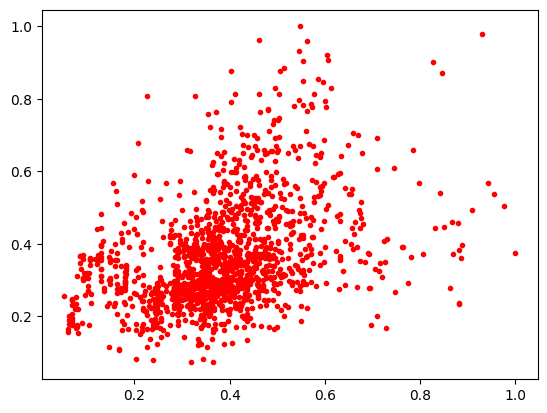

In [7]:
df = pd.read_csv('data/example_data.csv')
x = df['LotArea'].values
y = df['SalePrice'].values

plt.plot(x, y, 'r.');

We'll use the sklearn function to split the data into a train and test set. The `test_size` parameter indicates how much data is assigned to the test dataset.

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=10)
print("Number of observations:\nTrain: {} | Test: {}".format(x_train.shape[0], x_test.shape[0]))

Number of observations:
Train: 852 | Test: 569


We now want to train some models and make predictions for both the training data and the test data. Let's train three models:
* **Linear Regression**: You have learned about this model in SLU07. It is the closed form solution for optimising towards the RMSE.
* **SGDRegressor:** You have learned about this model in SLU07. It is an iterative solution for linear regression based on gradient descent. By default it optimises for the RMSE.
* **SGDRegressor_MAE:** This is a slight variation of the SGDRegressor where we change the loss to *epsilon insensitive* and the epsilon to 0. In this way, the SGD converges to MAE instead of RMSE.

In [9]:
x_train_lr = x_train.reshape(-1, 1)
x_test_lr = x_test.reshape(-1, 1)

# define the models
lr_1 = LinearRegression()
lr_2 = SGDRegressor(random_state=10)
lr_3 = SGDRegressor(loss='epsilon_insensitive', epsilon=0, random_state=10)

# fit the models
lr_1.fit(x_train_lr, y_train)
lr_2.fit(x_train_lr, y_train)
lr_3.fit(x_train_lr, y_train)

# predict for the train data
y_hat_train_1 = lr_1.predict(x_train_lr)
y_hat_train_2 = lr_2.predict(x_train_lr)
y_hat_train_3 = lr_3.predict(x_train_lr)

# predict for the test data
y_hat_test_1 = lr_1.predict(x_test_lr)
y_hat_test_2 = lr_2.predict(x_test_lr)
y_hat_test_3 = lr_3.predict(x_test_lr)

Let's compare the metrics on train and test datasets:

In [10]:
print("Mean Squared Error (MAE)")
print("LinearRegression (Train): {}".format(mae(y_train, y_hat_train_1)))
print("SGDRegressor (Train): {}".format(mae(y_train, y_hat_train_2)))
print("SGDRegressor_MAE (Train): {}".format(mae(y_train, y_hat_train_3)))
print("LinearRegression (Test): {}".format(mae(y_test, y_hat_test_1)))
print("SGDRegressor (Test): {}".format(mae(y_test, y_hat_test_2)))
print("SGDRegressor_MAE (Test): {}".format(mae(y_test, y_hat_test_3)))

print("\n========================\n")

print("Root Mean Squared Error (RMSE)")
print("LinearRegression (Train): {}".format(rmse(y_train, y_hat_train_1)))
print("SGDRegressor (Train): {}".format(rmse(y_train, y_hat_train_2)))
print("SGDRegressor_MAE (Train): {}".format(rmse(y_train, y_hat_train_3)))
print("LinearRegression (Test): {}".format(rmse(y_test, y_hat_test_1)))
print("SGDRegressor (Test): {}".format(rmse(y_test, y_hat_test_2)))
print("SGDRegressor_MAE (Test): {}".format(rmse(y_test, y_hat_test_3)))

print("\n========================\n")

print("R Squared (R2)")
print("LinearRegression (Train): {}".format(r2(y_train, y_hat_train_1)))
print("SGDRegressor (Train): {}".format(r2(y_train, y_hat_train_2)))
print("SGDRegressor_MAE (Train): {}".format(r2(y_train, y_hat_train_3)))
print("LinearRegression (Test): {}".format(r2(y_test, y_hat_test_1)))
print("SGDRegressor (Test): {}".format(r2(y_test, y_hat_test_2)))
print("SGDRegressor_MAE (Test): {}".format(r2(y_test, y_hat_test_3)))

Mean Squared Error (MAE)
LinearRegression (Train): 0.10458696001870452
SGDRegressor (Train): 0.10691756445904846
SGDRegressor_MAE (Train): 0.10201551648216647
LinearRegression (Test): 0.10231247228421318
SGDRegressor (Test): 0.10676318525512477
SGDRegressor_MAE (Test): 0.09976946697182527


Root Mean Squared Error (RMSE)
LinearRegression (Train): 0.13713041971628653
SGDRegressor (Train): 0.14084638029623728
SGDRegressor_MAE (Train): 0.1440540290850338
LinearRegression (Test): 0.1308432078624148
SGDRegressor (Test): 0.1369295525109932
SGDRegressor_MAE (Test): 0.13724366451104927


R Squared (R2)
LinearRegression (Train): 0.1454781963155536
SGDRegressor (Train): 0.09853904994075202
SGDRegressor_MAE (Train): 0.057011584851018426
LinearRegression (Test): 0.19233940791017634
SGDRegressor (Test): 0.11545301906486449
SGDRegressor_MAE (Test): 0.11139011953629918


As you can observe, the models trained on RMSE (LR and SGDRegressor) obtain slightly better RMSE (lower values) than the model trained on MAE (SGDRegressor_MAE) and vice versa. The effect in the dataset is not very strong, but it in line with what we previously discussed - you should always use the loss function that best approximates your evaluation metric.

Let's plot the test data to see the predictions.

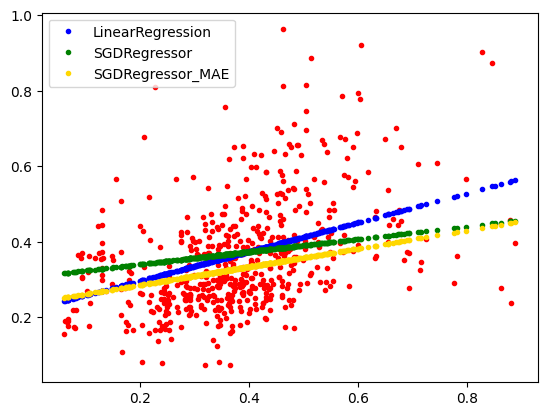

In [11]:
plt.plot(x_test, y_test, 'r.')
plt.plot(x_test, y_hat_test_1, '.', color='blue', label='LinearRegression')
plt.plot(x_test, y_hat_test_2, '.', color='green', label='SGDRegressor')
plt.plot(x_test, y_hat_test_3, '.', color='gold', label='SGDRegressor_MAE')
plt.legend();

This data does not have a clear linear trend and it kind of depends what you consider an outlier to decide which model you prefer. All models perform similarly. It is just interesting to see that the predictions of the MAE- and RMSE-trained models are different.

Finally, to make a consistent analysis, you need to know if the chosen metric should be minimised (like RMSE) or maximised (like R2). If you want to normalize this you can simply impose that your metric should be maximised, for example, and just reverse metrics that don't fit this definition. This is more important if you are using automatic model selection (see SLU13), than if you just look at the numbers in a table.

In this example, we use a negative RMSE and MAE to make an easier comparison. Now we know that a larger number is better for all the metrics employed here.

In [12]:
mae_mod = lambda y, y_hat: -mae(y, y_hat)
mse_mod = lambda y, y_hat: -mse(y, y_hat)
rmse_mod = lambda y, y_hat: -rmse(y, y_hat)

metrics = {
    'Negative MAE': mae_mod,
    'Negative RMSE': rmse_mod,
    'R2': r2
}

lrs = {
    'LinearRegressor': lr_1,
    'SGDRegressor': lr_2,
    'SGDRegressor_MAE': lr_3
}


for key, lr in lrs.items():
    lr.fit(x_train_lr, y_train)

lst = []
for metric, metric_f in metrics.items():  
    best = None 
    best_model = None
    lst_lst = []
    print("{}".format(metric))
    for key, lr in lrs.items():
        y_hat_train = lr.predict(x_train_lr)
        y_hat_test = lr.predict(x_test_lr)

        train_score = metric_f(y_train, y_hat_train)
        test_score = metric_f(y_test, y_hat_test)
        print("{} (Train): {}".format(key, train_score))
        print("{} (Test): {}".format(key, test_score))
        if not best or test_score > best:
            best = test_score
            best_model = key
        lst_lst.append([train_score,test_score])
    lst.append(lst_lst)
    print("\nBest model with {}: {}".format(metric, best_model))
    print("\n========================\n")

Negative MAE
LinearRegressor (Train): -0.10458696001870452
LinearRegressor (Test): -0.10231247228421318
SGDRegressor (Train): -0.10691756445904846
SGDRegressor (Test): -0.10676318525512477
SGDRegressor_MAE (Train): -0.10201551648216647
SGDRegressor_MAE (Test): -0.09976946697182527

Best model with Negative MAE: SGDRegressor_MAE


Negative RMSE
LinearRegressor (Train): -0.13713041971628653
LinearRegressor (Test): -0.1308432078624148
SGDRegressor (Train): -0.14084638029623728
SGDRegressor (Test): -0.1369295525109932
SGDRegressor_MAE (Train): -0.1440540290850338
SGDRegressor_MAE (Test): -0.13724366451104927

Best model with Negative RMSE: LinearRegressor


R2
LinearRegressor (Train): 0.1454781963155536
LinearRegressor (Test): 0.19233940791017634
SGDRegressor (Train): 0.09853904994075202
SGDRegressor (Test): 0.11545301906486449
SGDRegressor_MAE (Train): 0.057011584851018426
SGDRegressor_MAE (Test): 0.11139011953629918

Best model with R2: LinearRegressor




### 3.2 - Choosing the right metric

First, it is important to mention that you can use multiple metrics to evaluate the performace of your models, keeping in mind that when comparing two or more models, you need to use the same test dataset and evaluation metrics. Nevertheless, if you want to focus on optimizing a single evaluation metric, a very relevant question is:

What is the right metric for our problem?

Let's analyse the usefulness of each error metric depending on the objective and the problem we are trying to solve!

#### If you want to penalize your bad predictions very much
If you want to penalize your bad predictions very much, you can use **MSE** because it measures the average squared error of all the predictions. The bad predictions will have a large error which additionally will be squared, so they will weigh more.

#### If you want to easily interpret the metric value
If you want a metric that is interpretable, **MAE and RMSE** are your best choices since the two metrics are in the same units as our target values.

#### If you want more robustness to outliers
If your data has outliers you will probably need a metric that is more robust to it, so **MAE** is your best option. For more curious minds on why MAE is more robust to outliers, especially when compared to RMSE, the answer is quite simple: while minimizing the squared error over a set of numbers results in finding its mean, minimizing the absolute error results in finding its median. This is the reason why MAE is robust to outliers whereas RMSE is not.

#### If your model has a high number of features
In this case, when choosing between R² and Adjusted R², we should remember that the more features are added to a model, the more the R² increases even if some of those features are non-predictive. On the other hand, Adjusted R² improves just with the useful features and decreases if you add less useful features. For these reasons **Adjusted R²** is a better choice.

Wrapping up, the goal here is always to get a fair estimate of the distance between the predicted model and the actual values. Whichever metric you end up using, the critical point is to have a sound understanding of what the metric is telling you and choose a metric adequate to each problem. For now, move forward to the exercises and the next SLUs!

![goodbye](media/goodbye.gif)

## 4 - For the more curious

This notebook is not an exhaustive exploration of this topic. Here is some curated material if you want to learn more:
* [Sklearn - Regression metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)
* [H2O.ai - Regression metrics’ guide](https://www.h2o.ai/blog/regression-metrics-guide/)